### Before start, please replace every folder path

In [1]:
import pandas as pd
import numpy as np
import copy
from math import *
import os
import random
from collections import defaultdict
import csv
from functools import reduce
from copy import deepcopy
import pickle
from timeit import default_timer as timer
from matplotlib import pyplot as plt
from ase import Atoms
from ase.io import read
from ase.io import write
from ase.visualize import view
import itertools

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
folder_path = 'FER_36'

In [4]:
%run helper_functions.py

#### Read lat.in

In [5]:
filepath=folder_path+'/lat.in'
lattice = read_lat_in(filepath)

In [6]:
lattice.keys()

dict_keys(['a', 'b', 'c', 'alpha', 'beta', 'gamma', 'u', 'v', 'w', 'sites'])

#### Run corrdump, generate clusters.out

In [7]:
#need to FER_36nge path before running the following command
!corrdump -l=FER_36/lat.in -cf=FER_36/clusters.out -2=6.6 -3=6.6

Unable to open structure file


#### Read clusters.out

In [8]:
filepath = folder_path+'/clusters.out'
cluster_out_lines = read_clusters_out(filepath)

In [9]:
lat_clusters = break_down_cluster_out_lines(cluster_out_lines, lattice)

In [ ]:
#need to FER_36nge path before running the following command
!mkdir FER_36/lattice_clusters
!mkdir FER_36/lattice_clusters/xyzs
!mkdir FER_36/lattice_clusters/images

In [25]:
#visualize all n-body clusters
nsite = 1
for i in range(1, int(lat_clusters['type_number'][nsite])+1):
    #print(i)
    str_vec = [0 for i in range(len(lat_clusters['lat_vis_sites'].index))]
    sites = lat_clusters['{}-{}'.format(nsite, i)]['eg_pair_frac']
    uvwmax = find_max_uvw_from_cluster_frac(lattice_axes_abc(lattice), sites)
    for site in sites:
        #print(site)
        index = find_df_index_frac(site, lat_clusters['lat_vis_sites'])
        str_vec[index] = 1
    xyz_filepath = folder_path+'/lattice_clusters/xyzs/cluster-{}-{}.xyz'.format(nsite, i)
    png_filepath = folder_path+'/lattice_clusters/images/cluster-{}-{}.png'.format(nsite, i)
    visualize_str_no_rep(lat_clusters['lat_vis_sites'], str_vec, xyz_filepath, png_filepath, uvwmax)

In [84]:
cluster_type = '2-20'
c= read(folder_path+'/lattice_clusters/xyzs/cluster-{}.xyz'.format(cluster_type))
view(c)

In [27]:
cluster_type = '2-23'
c= read(folder_path+'/lattice_clusters/xyzs/cluster-{}.xyz'.format(cluster_type))
view(c)

In [22]:
cluster_type = '2-27'
c= read(folder_path+'/lattice_clusters/xyzs/cluster-{}.xyz'.format(cluster_type))
view(c)

In [23]:
cluster_type = '2-30'
c= read(folder_path+'/lattice_clusters/xyzs/cluster-{}.xyz'.format(cluster_type))
view(c)

#### read str_dim.txt

In [28]:
%run helper_functions.py

In [29]:
filepath = folder_path+'/str_dim.txt'
structure = read_str_dim(filepath, lattice)

In [30]:
filepath = folder_path+'/str.out'
prepare_str_out(structure, filepath)

In [48]:
#need to change path before running the following command
if os.path.isfile('FER_36/cluster_list.csv'):
    os.remove('FER_36/cluster_list.csv')
    
!corrdump -l=FER_36/lat.in -s=FER_36/str.out -cf=FER_36/clusters.out -2=7 -3=7 >> FER_36/cluster_list.csv

#### read cluster list

In [55]:
%run helper_functions.py

In [56]:
filepath = folder_path+'/cluster_list.csv'
str_clusters = read_cluster_list(filepath, structure, lat_clusters)

In [57]:
break_down_cluster_list(str_clusters, structure)

In [52]:
#need to FER_36nge path before running the following command
!mkdir FER_36/structure_clusters_rep
!mkdir FER_36/structure_clusters_rep/xyzs
!mkdir FER_36/structure_clusters_rep/images

In [53]:
#need to FER_36nge path before running the following command
!mkdir FER_36/structure_clusters_no_rep
!mkdir FER_36/structure_clusters_no_rep/xyzs
!mkdir FER_36/structure_clusters_no_rep/images

In [58]:
visualize_structure_one_cluster_type_all_examples(str_clusters, structure, folder_path, '2-20')
visualize_structure_one_cluster_type_all_examples(str_clusters, structure, folder_path, '2-23')
visualize_structure_one_cluster_type_all_examples(str_clusters, structure, folder_path, '2-27')
visualize_structure_one_cluster_type_all_examples(str_clusters, structure, folder_path, '2-30')

In [27]:
#visualize_structure_all_clusters(str_clusters, structure, folder_path, rep='y')

#### pair sites for structure sites

In [59]:
%run helper_functions.py

In [60]:
add_cluster_list_site_index(str_clusters,structure)

In [61]:
add_pair_sites(structure, str_clusters)

#### count clusters for a given configuration

In [62]:
%run helper_functions.py

In [63]:
str_vec = [1 for i in range(len(structure['str_sites'].index))]

In [64]:
counting_types = []

In [ ]:
count_clusters_str_config(str_vec, structure, str_clusters, counting_types)

#### random generate one structure configuration

In [73]:
%run helper_functions.py

In [67]:
#need to FER_36nge path before running the following command
!mkdir FER_36/random_config_process
!mkdir FER_36/random_config_process/xyzs
!mkdir FER_36/random_config_process/images

#### no rules

In [74]:
penalty = {}
Al_num = 12
str_vec = random_config_hybrid(structure, str_clusters, Al_num, penalty, vis=1, folder_path=folder_path, max_try = 100)
cal_penalty(str_vec, structure, str_clusters, penalty)

0

In [75]:
c= read(folder_path+'/random_config_process/xyzs/select-{}.xyz'.format(Al_num))
view(c)

#### rules: no 1NN

In [81]:
penalty = {'2-1':1, '2-2':1, '2-3':1,'2-4':1, '2-5':1, '2-6': 1, '2-7':1, '2-8':1}
Al_num = 12
str_vec = random_config_hybrid(structure, str_clusters, Al_num, penalty, vis=1, folder_path=folder_path, max_try = 100)
cal_penalty(str_vec, structure, str_clusters, penalty)

0

In [82]:
c= read(folder_path+'/random_config_process/xyzs/select-{}.xyz'.format(Al_num))
view(c)

In [71]:
c= read(folder_path+'/random_config_process/xyzs/swap-0.xyz')
view(c)

#### titrate clusters for one structure configuration

In [62]:
%run helper_functions.py

In [63]:
cluster_type_dict = prepare_cluster_type_dict(str_clusters)

In [64]:
penalty

{'2-1': 1,
 '2-2': 1,
 '2-3': 1,
 '2-4': 1,
 '2-5': 1,
 '2-6': 1,
 '2-7': 1,
 '2-8': 1}

In [ ]:
str_vec = random_config_hybrid(structure, str_clusters, 340, penalty, max_try = 100)

In [ ]:
np.sum(str_vec)

In [ ]:
cal_penalty(str_vec,structure, str_clusters, penalty)

In [162]:
d1 = titrate_config_one_group(str_vec, structure, str_clusters, cluster_type_dict, counting_types=['2-9','2-10','2-20','2-23'])

In [163]:
d2 = titrate_config_multi_groups(str_vec, structure, str_clusters, cluster_type_dict, counting_groups=[['2-9','2-10','2-20','2-23']], repeat_num = 10)

In [164]:
d2['2-9']

[60, 60, 60, 60, 60, 60, 60, 60, 60, 60]

In [165]:
d2['2-10']

[47, 47, 47, 47, 47, 47, 47, 47, 47, 47]

#### generate multiple random structure configurations for one compositions

In [166]:
#need to FER_36nge path before running the following command
!mkdir FER_36/random_configs
!mkdir FER_36/random_configs/xyzs
!mkdir FER_36/random_configs/images

mkdir: CHA/random_configs: File exists
mkdir: CHA/random_configs/xyzs: File exists
mkdir: CHA/random_configs/images: File exists


In [167]:
%run helper_functions.py

In [186]:
str_vecs = random_config_mult(structure, str_clusters, 250, penalty, 10, vis=1, folder_path=folder_path, max_try = 100)

In [ ]:
c= read(folder_path+'/random_configs/images/config-9.xyz')
view(c)

## FER_36



#### count clusters for multiple configurations

In [169]:
%run helper_functions.py

In [188]:
count_results = count_clusters_multi_configs(str_vecs, structure, str_clusters, counting_types=['2-7','2-11'],excluding_types=['3-6'])

#### titrate clusters for multiple configurations

In [172]:
%run helper_functions.py

In [194]:
titrate_clusters = titrate_clusters_multi_configs(str_vecs, structure, str_clusters, cluster_type_dict, counting_groups=[['2-7', '2-11']], excluding_types=['3-6'], titrate_num=1)

#### count for all Al

In [136]:
%run helper_functions.py

In [68]:
len(structure['str_sites'][structure['str_sites'].multi_atoms == True].index)

576

In [69]:
str_vecs = random_config_mult(structure, str_clusters, 576, penalty={}, config_num=1, max_try = 100)

In [70]:
#count for all Al
counting_types = ['2-6', '2-7', '2-9', '2-10', '2-20', '2-23']

all_al_count_result = count_clusters_multi_configs(str_vecs, structure, str_clusters, counting_types=counting_types)
values1 = [np.mean(all_al_count_result[t])/576 for t in counting_types]
errors1 = [np.std(all_al_count_result[t]) for t in counting_types]

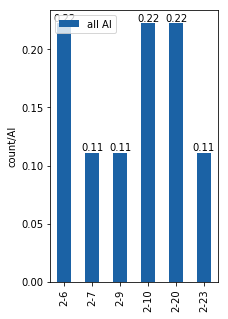

In [72]:
plot_one_bar_chart(folder_path+'/all_al_count.png',counting_types, values1, ylabel='count/Al', label='all Al')

#### rules(no 1NN) vs no rules

In [73]:
penalty

{'2-1': 1,
 '2-2': 1,
 '2-3': 1,
 '2-4': 1,
 '2-5': 1,
 '2-6': 1,
 '2-7': 1,
 '2-8': 1}

In [ ]:
#Si/Al = 4

In [97]:
str_vecs_no_1NN = random_config_mult(structure, str_clusters, 115, penalty=penalty, config_num=100, max_try = 100)

In [98]:
str_vecs_no_rules = random_config_mult(structure, str_clusters, 115, penalty={}, config_num=100, max_try = 100)

In [99]:
count_results_no_1NN = count_clusters_multi_configs(str_vecs_no_1NN, structure, str_clusters, counting_types=counting_types)

In [100]:
count_results_no_rules = count_clusters_multi_configs(str_vecs_no_rules, structure, str_clusters, counting_types=counting_types)

In [125]:
count_results_no_rules['Al-Al in 6-membered ring'] = []
for i in range(100):
    total = 0
    for t in counting_types:
        total += count_results_no_rules[t][i]
    count_results_no_rules['Al-Al in 6-membered ring'].append(total)

In [128]:
count_results_no_1NN['Al-Al in 6-membered ring'] = []
for i in range(100):
    total = 0
    for t in counting_types:
        total += count_results_no_1NN[t][i]
    count_results_no_1NN['Al-Al in 6-membered ring'].append(total)

In [129]:
values1 = [np.mean(count_results_no_rules['Al-Al in 6-membered ring'])/115]
errors1 = [np.std(count_results_no_rules['Al-Al in 6-membered ring'])/115]
values2 = [np.mean(count_results_no_1NN['Al-Al in 6-membered ring'])/115]
errors2 = [np.std(count_results_no_1NN['Al-Al in 6-membered ring'])/115]

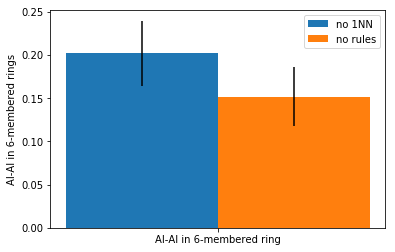

In [137]:
plot_two_bar_charts(folder_path+'/rules vs no rules.png', ['Al-Al in 6-membered ring'], values1, values2, errors1, errors2, ylabel='Al-Al in 6-membered rings', label1='no 1NN', label2='no rules')

#### count vs titrate

In [104]:
counting_types = ['2-6', '2-7', '2-9', '2-10', '2-20', '2-23']

In [114]:
len(str_vecs_no_rules)

100

In [106]:
titrate_result = titrate_clusters_multi_configs(str_vecs_no_rules, structure, str_clusters, cluster_type_dict, counting_groups=[['2-6', '2-7', '2-9', '2-10', '2-20', '2-23']], titrate_num=100)

In [124]:
titrate_result['Al-Al in 6-membered ring'] = []
for i in range(100):
    total = 0
    for t in counting_types:
        total += titrate_result[t][i]
    titrate_result['Al-Al in 6-membered ring'].append(total)

In [126]:
values1 = [np.mean(count_results_no_rules['Al-Al in 6-membered ring'])/115]
errors1 = [np.std(count_results_no_rules['Al-Al in 6-membered ring'])/115]
values2 = [np.mean(titrate_result['Al-Al in 6-membered ring'])/115]
errors2 = [np.std(titrate_result['Al-Al in 6-membered ring'])/115]

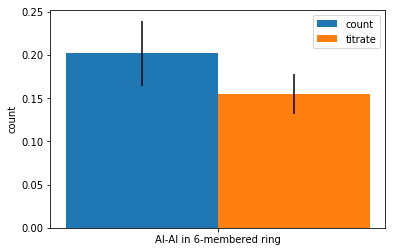

In [127]:
plot_two_bar_charts(folder_path+'/count vs titrate.png', ['Al-Al in 6-membered ring'], values1, values2, errors1, errors2, ylabel='count', label1='count', label2='titrate')

#### composition

In [ ]:
Si_Al_ratios = [2.5, 5, 7.5, 10, 15, 20, 25, 30, 35, 40]
Al_ratios = [1/(1+x) for x in Si_Al_ratios]
Al_nums = [int(Al_ratio*len(structure['str_sites'][structure['str_sites'].multi_atoms == True].index)) for Al_ratio in Al_ratios]

In [ ]:
values_fer = []
errors_fer = []
for i in range(10):
    filename = folder_path+'/jobs/titrate_results_{}.p'.format(i+1)
    titrate_result = pickle.load(open(filename, 'rb'))
    t = [titrate_result['2-6'][i] + titrate_results['2-7'][i] + titrate_result['2-9'][i] + titrate_results['2-10'][i]+ titrate_result['2-20'][i] + titrate_results['2-23'][i] for i in range(len(titrate_result['2-6']))]
    values_fer.append(np.mean(t))
    errors_fer.append(np.std(t))

#### jobs

In [77]:
import pickle

In [79]:
!mkdir FER_36/jobs

In [80]:
pickle.dump(lattice, open(folder_path+'/jobs/lattice.p','wb'))

In [81]:
pickle.dump(structure, open(folder_path+'/jobs/structure.p','wb'))

In [82]:
pickle.dump(lat_clusters, open(folder_path+'/jobs/lat_clusters.p','wb'))
pickle.dump(str_clusters, open(folder_path+'/jobs/str_clusters.p','wb'))

In [89]:
pickle.dump(penalty, open(folder_path+'/jobs/penalty.p', 'wb'))

In [90]:
py_template = '''import pandas as pd
import numpy as np
import copy
from math import *
import os
import random
from collections import defaultdict
import csv
from functools import reduce
from copy import deepcopy
import pickle
from timeit import default_timer as timer
from matplotlib import pyplot as plt
from ase import Atoms
from ase.io import read
from ase.io import write
from ase.visualize import view
import itertools

from helper_functions import *

lattice = pickle.load(open('lattice.p','rb'))
structure = pickle.load(open('structure.p','rb'))
lat_clusters = pickle.load(open('lat_clusters.p','rb'))
str_clusters = pickle.load(open('str_clusters.p','rb'))
penalty = pickle.load(open('penalty.p','rb'))
Al_num = {0}
cluster_type_dict = prepare_cluster_type_dict(str_clusters)

str_vecs = random_config_mult(structure, str_clusters, Al_num, penalty, 100, max_try = 1000)
titrate_results = titrate_clusters_multi_configs(str_vecs, structure, str_clusters, cluster_type_dict, counting_groups=[['2-6', '2-7', '2-9', '2-10', '2-20', '2-23']], excluding_types=['3-44'], titrate_num=1)
pickle.dump(dict(titrate_results), open('titrate_results_{1}.p', 'wb'))
'''

In [91]:
Al_nums

[164, 96, 67, 52, 36, 27, 22, 18, 16, 14]

In [92]:
for i, ratio in enumerate(Si_Al_ratios):
    filename = folder_path+'/jobs/J{}.py'.format(i+1)
    if os.path.isfile(filename):
        os.remove(filename)
    with open(filename, 'a') as file:
        file.write(py_template.format(Al_nums[i], i+1))

In [93]:
qscript_template = '''#!/bin/bash
#$ -q *@@crc
#$ -pe smp 2
python J{}.py
'''

In [94]:
for i, ratio in enumerate(Si_Al_ratios):
    filename = folder_path+'/jobs/J{}.sh'.format(i+1)
    if os.path.isfile(filename):
        os.remove(filename)
    with open(filename, 'a') as file:
        file.write(qscript_template.format(i+1))

In [95]:
titrate_results = []

In [96]:
for i in range(1):
    filename = folder_path+'/jobs/titrate_results_{}.p'.format(i+1)
    titrate_result = pickle.load(open(filename, 'rb'))
    tirate_results.append(titrate_result)

FileNotFoundError: [Errno 2] No such file or directory: 'FER/jobs/titrate_results_1.p'

In [232]:
titrate_results

[]

In [ ]:
titrate_results_1 = pickle